In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from common_import import *

In [5]:
### verify laod data
data_type_list = [
    'source_list', 'cam_param',
    'img_2d', 'img_2d_canonical_revolute',
    'img_3d_norm', 'scale_factor_norm', # from ours
    'img_3d_norm_canonical_revolute', 'scale_factor_norm_canonical_revolute', # from ours
]
overwrite_list = []
dataset_name = 'h36m'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M img_2d...
[overwrite: False] ==> Loading H36M img_2d_canonical_revolute...
[overwrite: False] ==> Loading H36M img_3d_norm...
[overwrite: False] ==> Loading H36M scale_factor_norm...
[overwrite: False] ==> Loading H36M img_3d_norm_canonical_revolute...
[overwrite: False] ==> Loading H36M scale_factor_norm_canonical_revolute...


In [15]:
source_list = data['source_list'].copy()
source = source_list[0]
subject, cam_id, action = split_source_name(source, dataset_name)
cam_param = data['cam_param'][subject][action][cam_id].copy()
intrinsic = cam_param['intrinsic']
W, H = cam_param['W'], cam_param['H']
img_3d_norm = data['img_3d_norm'][subject][action][cam_id].copy()
scale_factor_norm = data['scale_factor_norm'][subject][action][cam_id].copy()
img_3d_norm_canonical_revolute = data['img_3d_norm_canonical_revolute'][subject][action][cam_id].copy()
scale_factor_norm_canonical_revolute = data['scale_factor_norm_canonical_revolute'][subject][action][cam_id].copy()
img_2d = data['img_2d'][subject][action][cam_id].copy()
img_2d_norm = normalize_input(img_2d, W, H)
img_2d_canonical_revolute = data['img_2d_canonical_revolute'][subject][action][cam_id].copy()
img_2d_canonical_revolute_norm = normalize_input(img_2d_canonical_revolute, W, H)

img_2d_norm_hat = img_2d_norm.copy() - img_2d_norm[:, 0:1]
img_3d_norm_hat = img_3d_norm.copy() - img_3d_norm[:, 0:1]
img_2d_canonical_revolute_norm_hat = img_2d_canonical_revolute_norm.copy() - img_2d_canonical_revolute_norm[:, 0:1]
img_3d_norm_canonical_revolute_hat = img_3d_norm_canonical_revolute.copy() - img_3d_norm_canonical_revolute[:, 0:1]

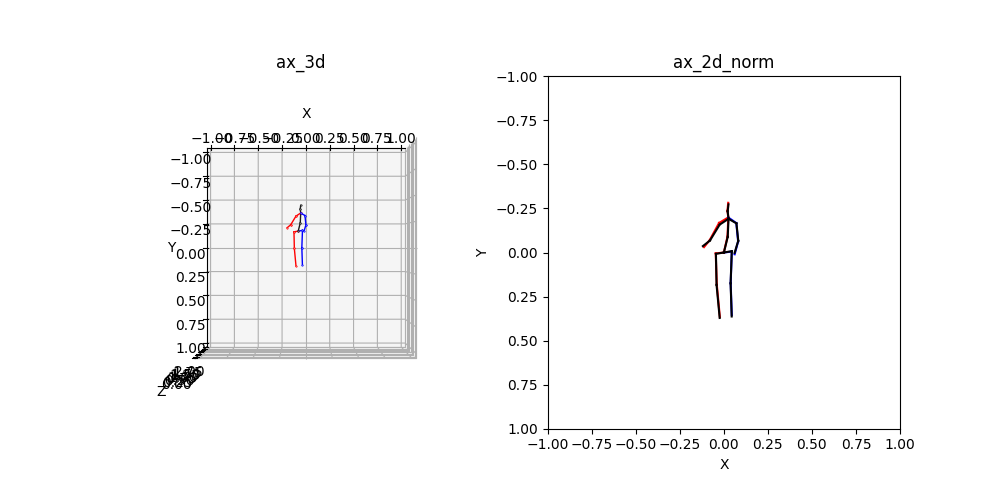

In [14]:
%matplotlib widget
# check original train data
frame_num = 0
configs = {
    'ax_3d': {'type': '3d', 'loc': 121, 'mode': 'cam', 'xlim': [-1, 1], 'ylim': [-1, 1], 'zlim': [0, 2]},
    'ax_2d_norm': {'type': '2d', 'loc': 122, 'normalize': True},
}

fig, axs = generate_axes(0, configs, figsize=[10, 5], fig_title='')
plot_pose_setting = [
    ('ax_3d', img_3d_norm, {'color': '', 'label': ''}),
    ('ax_2d_norm', img_2d_norm_hat, {'color': '', 'label': ''}),
    ('ax_2d_norm', img_3d_norm_hat[..., :2], {'color': 'k', 'label': ''}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
plt.show()

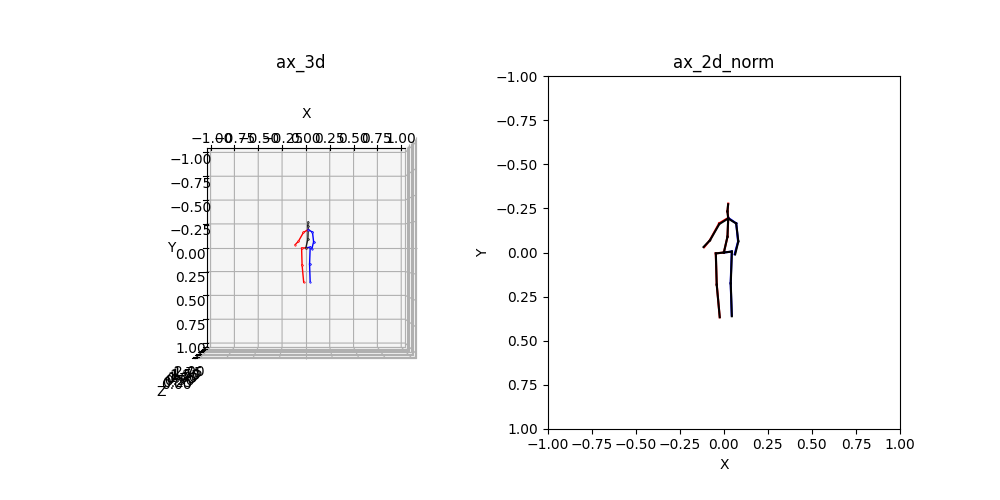

In [16]:
%matplotlib widget
# check original train data
frame_num = 0
configs = {
    'ax_3d': {'type': '3d', 'loc': 121, 'mode': 'cam', 'xlim': [-1, 1], 'ylim': [-1, 1], 'zlim': [0, 2]},
    'ax_2d_norm': {'type': '2d', 'loc': 122, 'normalize': True},
}

fig, axs = generate_axes(1, configs, figsize=[10, 5], fig_title='')
plot_pose_setting = [
    ('ax_3d', img_3d_norm_canonical_revolute, {'color': '', 'label': ''}),
    ('ax_2d_norm', img_2d_canonical_revolute_norm_hat, {'color': '', 'label': ''}),
    ('ax_2d_norm', img_3d_norm_canonical_revolute_hat[..., :2], {'color': 'k', 'label': ''}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
plt.show()